In [19]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import spearmanr
import seaborn as sns

In [26]:
trends_data = pd.read_csv('google_trends_data_bref.csv', parse_dates=True, index_col='date')
indicator_data = pd.read_csv('GBP_USD Historical Data.csv', parse_dates=True, index_col='Date')
indicator_data = indicator_data.iloc[::-1] #flip order
indicator_data = indicator_data[::5]
indicator_data = indicator_data.rename(columns={"Price": "Closing price of GBP"})

In [27]:
indicator_data

,Closing price of GBP,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-06-22,1.5825,1.5870,1.5912,1.5806,NaN,-0.37%
2015-06-29,1.5739,1.5694,1.5789,1.5665,NaN,-0.08%
2015-07-06,1.5606,1.5538,1.5633,1.5535,NaN,0.23%
2015-07-13,1.5488,1.5505,1.5591,1.5480,NaN,-0.24%
2015-07-20,1.5566,1.5610,1.5629,1.5539,NaN,-0.28%
...,...,...,...,...,...,...
2017-05-22,1.3000,1.3007,1.3044,1.2965,NaN,-0.27%
2017-05-29,1.2841,1.2807,1.2853,1.2791,NaN,0.29%
2017-06-05,1.2903,1.2850,1.2942,1.2847,NaN,0.12%


In [28]:
trends_data

,Astrology,Horoscope,Fortune telling,Psychic,Tarot reading,Numerology,Palm reading,Clairvoyant,Crystal ball,Magic spells,Occult,Spiritual healing,Witchcraft,Mediumship,Superstition
date,,,,,,,,,,,,,,,
2015-06-21,56,63,0,66,96,52,47,45,41,64,80,0,55,0,58
2015-06-28,71,70,45,63,88,46,73,56,55,61,73,62,49,0,49
2015-07-05,58,66,35,70,91,62,58,61,45,100,68,45,48,0,65
2015-07-12,65,71,67,67,94,62,59,52,60,89,72,89,55,0,59
2015-07-19,60,66,53,69,85,56,55,55,40,64,56,55,52,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-21,53,56,53,68,69,69,32,51,49,37,91,63,47,0,81
2017-05-28,60,56,0,69,73,74,46,53,40,52,76,0,60,79,49
2017-06-04,52,53,0,68,67,59,44,54,48,37,84,51,95,53,48


In [29]:
results = {}

# Loop through each column of the second DataFrame
for column in trends_data.columns:
    # Compute Spearman rank correlation
    corr, p_value = spearmanr(indicator_data['Closing price of GBP'], trends_data[column])
    # Store the results
    results[column] = (corr, p_value)

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['Spearman Corr', 'P-value']).T

print(results_df)

                   Spearman Corr       P-value
Astrology               0.494415  8.299952e-08
Horoscope               0.489541  1.160397e-07
Fortune telling         0.235543  1.556988e-02
Psychic                -0.219682  2.434068e-02
Tarot reading           0.805652  3.669366e-25
Numerology             -0.299613  1.902593e-03
Palm reading            0.286107  3.088968e-03
Clairvoyant             0.207671  3.352337e-02
Crystal ball            0.125736  2.012257e-01
Magic spells            0.398912  2.497207e-05
Occult                 -0.282134  3.546754e-03
Spiritual healing       0.130340  1.850845e-01
Witchcraft              0.030038  7.609899e-01
Mediumship             -0.032587  7.413925e-01
Superstition           -0.226452  2.018320e-02


In [35]:
latex_code = results_df.to_latex(index=True, float_format="%.2e")

print(latex_code)

\begin{tabular}{lrr}
\toprule
 & Spearman Corr & P-value \\
\midrule
Astrology & 4.94e-01 & 8.30e-08 \\
Horoscope & 4.90e-01 & 1.16e-07 \\
Fortune telling & 2.36e-01 & 1.56e-02 \\
Psychic & -2.20e-01 & 2.43e-02 \\
Tarot reading & 8.06e-01 & 3.67e-25 \\
Numerology & -3.00e-01 & 1.90e-03 \\
Palm reading & 2.86e-01 & 3.09e-03 \\
Clairvoyant & 2.08e-01 & 3.35e-02 \\
Crystal ball & 1.26e-01 & 2.01e-01 \\
Magic spells & 3.99e-01 & 2.50e-05 \\
Occult & -2.82e-01 & 3.55e-03 \\
Spiritual healing & 1.30e-01 & 1.85e-01 \\
Witchcraft & 3.00e-02 & 7.61e-01 \\
Mediumship & -3.26e-02 & 7.41e-01 \\
Superstition & -2.26e-01 & 2.02e-02 \\
\bottomrule
\end{tabular}



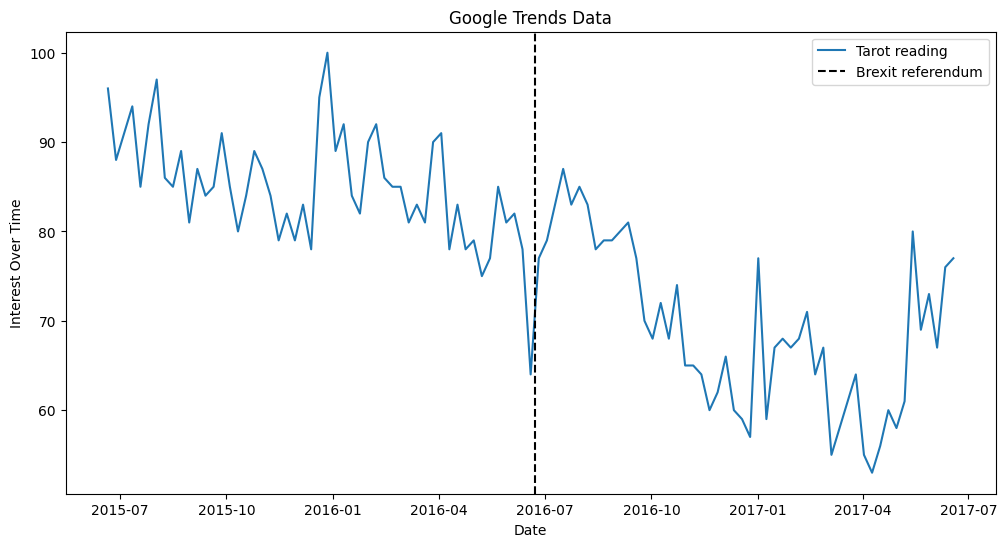

In [30]:
def plot_trends(data, keywords, vline_date=None):
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        topic_data = data[keyword]
        plt.plot(topic_data.index, topic_data, label=keyword)
    
    # Check if a vertical line date is provided
    if vline_date:
        # Convert the string date to datetime if your index is in datetime format
        vline_datetime = pd.to_datetime(vline_date)
        plt.axvline(x=vline_datetime, color='k', linestyle='--', label='Brexit referendum')
    
    plt.title('Google Trends Data')
    plt.xlabel('Date')
    plt.ylabel('Interest Over Time')
    plt.legend()
    plt.show()

# Assuming trends_data is your dataframe and it's indexed by date in datetime format
# Plot the trends and add a vertical line
plot_trends(trends_data, ["Tarot reading"], '2016-06-23')


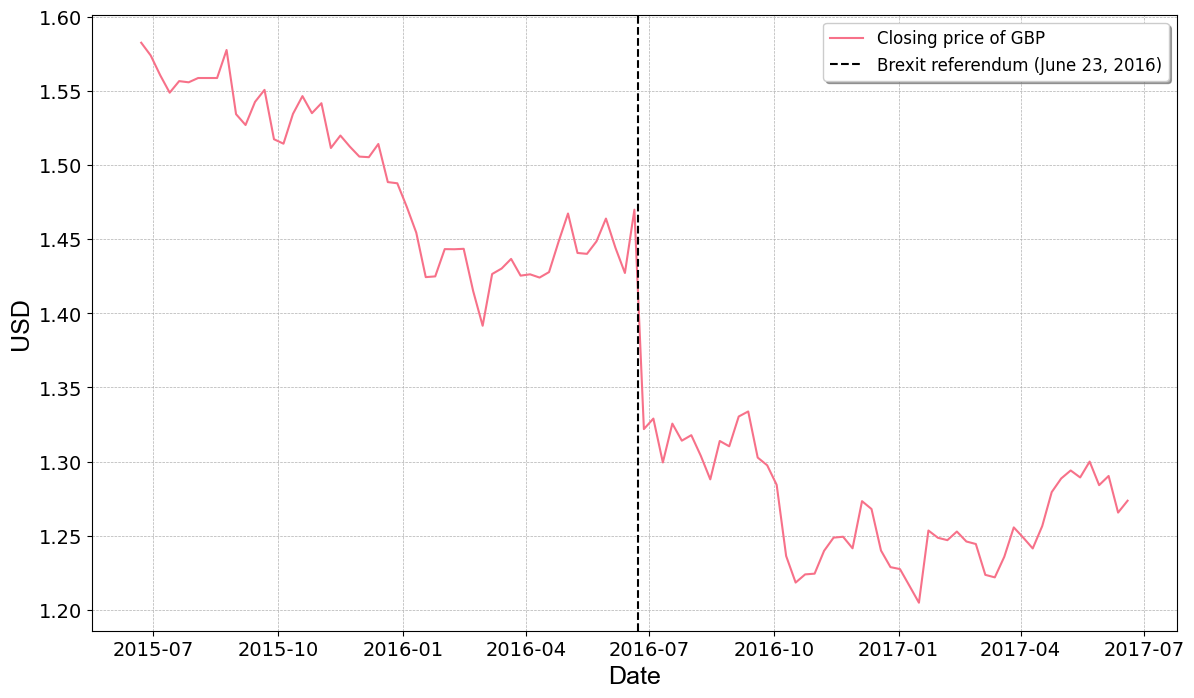

In [31]:
def plot_indicator(data, keywords, vline_date=None):
    plt.figure(figsize=(14, 8))

    # Set the font properties to Arial and black color
    title_font = {'family': 'Arial',
                  'color': 'black',
                  'weight': 'normal',
                  'size': 20,  # Increase title font size
                  }

    label_font = {'family': 'Arial',
                  'color': 'black',
                  'weight': 'normal',
                  'size': 16,  # Increase label font size
                  }

    tick_font_size = 14  # Font size for x and y ticks

    # Use a color palette
    colors = sns.color_palette("husl", len(keywords))

    # Plot each keyword's data
    for i, keyword in enumerate(keywords):
        topic_data = data[keyword]
        plt.plot(topic_data.index, topic_data, label=keyword, color=colors[i])

    # Check if a vertical line date is provided
    if vline_date:
        # Convert the string date to datetime if your index is in datetime format
        vline_datetime = pd.to_datetime(vline_date)
        plt.axvline(x=vline_datetime, color='k', linestyle='--', label='Brexit referendum (June 23, 2016)')

    # Add a grid
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Set titles and labels
    #plt.title('Google Trends Data', fontdict=title_font)
    plt.xlabel('Date', fontdict=label_font, fontsize=18)  # Increased font size
    plt.ylabel('USD', fontdict=label_font, fontsize=18)  # Increased font size

    # Customize the legend
    plt.legend(loc='best', frameon=True, shadow=True, fontsize='large')

    # Adjust tick parameters
    plt.xticks(fontsize=tick_font_size)
    plt.yticks(fontsize=tick_font_size)

    plt.show()
# Assuming trends_data is your dataframe and it's indexed by date in datetime format
# Plot the trends and add a vertical line
plot_indicator(indicator_data, ["Closing price of GBP"], '2016-06-23')